Classification Metrics:


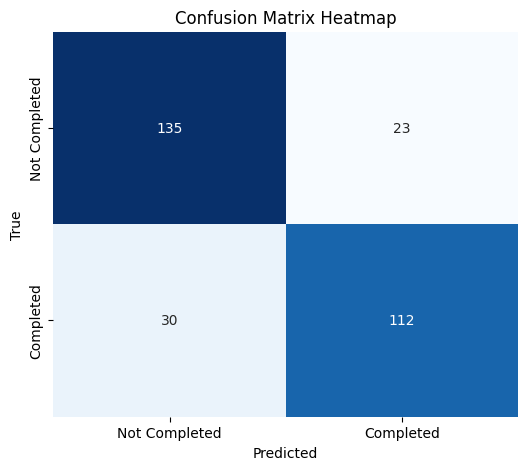

Accuracy: 0.8233
Precision: 0.8296
Recall: 0.7887

Clustering Metrics:
Silhouette Score: 0.8447


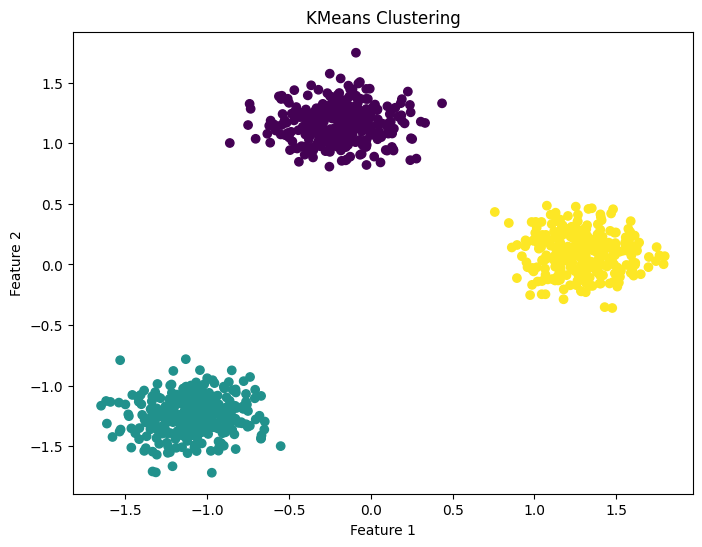

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.datasets import make_classification
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression

# 1. Classification: Generating confusion matrix and evaluation metrics
def classification_metrics_and_heatmap(y_true, y_pred):
    # Generate confusion matrix
    cm = confusion_matrix(y_true, y_pred)

    # Plot confusion matrix as heatmap
    plt.figure(figsize=(6, 5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=['Not Completed', 'Completed'], yticklabels=['Not Completed', 'Completed'])
    plt.title('Confusion Matrix Heatmap')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()

    # Calculate metrics
    accuracy = accuracy_score(y_true, y_pred)
    precision = precision_score(y_true, y_pred)
    recall = recall_score(y_true, y_pred)

    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")

    return accuracy, precision, recall

# 2. Clustering: KMeans and silhouette score
def clustering_and_metrics(n_samples=1000, n_features=2, n_clusters=3):
    # Generate synthetic data for clustering
    X, _ = make_blobs(n_samples=n_samples, n_features=n_features, centers=n_clusters, random_state=42)

    # Standardize the data
    X_scaled = StandardScaler().fit_transform(X)

    # Apply KMeans clustering
    # Ensure the latest version of scikit-learn is installed to avoid FutureWarning related to init parameter
    # You can install or upgrade with: !pip install --upgrade scikit-learn
    kmeans = KMeans(n_clusters=n_clusters, random_state=42, n_init=10) # Added n_init to suppress future warning
    y_pred = kmeans.fit_predict(X_scaled)

    # Evaluate clustering using silhouette score
    silhouette_avg = silhouette_score(X_scaled, y_pred)
    print(f"Silhouette Score: {silhouette_avg:.4f}")

    # Plot the clusters
    plt.figure(figsize=(8, 6))
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y_pred, cmap='viridis')
    plt.title('KMeans Clustering')
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    plt.show()

    return silhouette_avg

# 3. Main function: Combine classification and clustering tasks
def main():
    # --- Classification Example ---
    # Generate synthetic binary classification data
    X_class, y_class = make_classification(n_samples=1000, n_features=10, n_informative=5, n_classes=2, random_state=42)

    # Split into train-test sets
    X_train, X_test, y_train, y_test = train_test_split(X_class, y_class, test_size=0.3, random_state=42)

    # Train a simple classifier (Logistic Regression)
    # Logistic Regression is already imported at the top
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Classification metrics and heatmap
    print("Classification Metrics:")
    classification_metrics_and_heatmap(y_test, y_pred)

    # --- Clustering Example ---
    print("\nClustering Metrics:")
    clustering_and_metrics()

# Execute the main function
if __name__ == "__main__": # Corrected the typo from _name_ to __name__
    main()